In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import DBSCAN
from sklearn.metrics import accuracy_score, silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the breast cancer dataset
breast_cancer_dataset = load_breast_cancer()

In [3]:
# Create a DataFrame from the dataset
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns=breast_cancer_dataset.feature_names)
target = breast_cancer_dataset.target

In [4]:
# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_frame)

In [5]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

In [8]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=1.0, min_samples=5)
cluster_labels = dbscan.fit_predict(X_train)

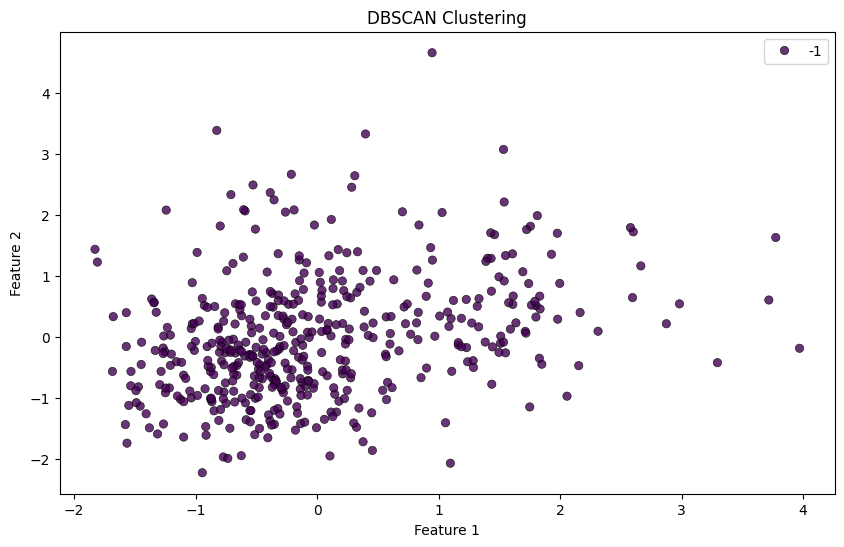

In [9]:
# Visualize the clusters, differentiate noise points
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=cluster_labels, palette='viridis', 
                legend='full', alpha=0.8, edgecolor='k')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper right')
plt.show()

In [11]:
# Calculate accuracy (if ground truth labels are available)
# Similar to before, if ground truth labels are available, we can calculate accuracy
# Calculate accuracy (if ground truth labels are available)
if y_train is not None:
    if -1 in cluster_labels:
        print("DBSCAN assigned all points as noise, cannot calculate accuracy")
    else:
        valid_cluster_labels = cluster_labels
        valid_y_train = y_train

        majority_target_label = np.argmax(np.bincount(valid_y_train))
        mapped_cluster_labels = np.where(valid_cluster_labels == 0, majority_target_label, 1 - majority_target_label)

        accuracy = accuracy_score(valid_y_train, mapped_cluster_labels)
        print("Accuracy:", accuracy)
else:
    print("Ground truth labels not available, cannot calculate accuracy")


DBSCAN assigned all points as noise, cannot calculate accuracy


In [13]:
# Calculate performance metrics
if len(np.unique(cluster_labels)) > 1:
    # Silhouette score
    silhouette = silhouette_score(X_train, cluster_labels)
    print("Silhouette Score:", silhouette)

    # Davies–Bouldin index
    davies_bouldin = davies_bouldin_score(X_train, cluster_labels)
    print("Davies–Bouldin Index:", davies_bouldin)

    # Calinski-Harabasz index
    calinski_harabasz = calinski_harabasz_score(X_train, cluster_labels)
    print("Calinski-Harabasz Index:", calinski_harabasz)
else:
    print("Insufficient clusters to calculate performance metrics")


Insufficient clusters to calculate performance metrics
